# Averaging and Re-Referencing ERPs

Recall that ERPs are typically averaged across many trials within each condition, to improve the signal-to-noise ratio. Since averaging across trials is typically the end goal of an ERP experiment, MNE has a distinct class, `Evoked`, for ERP data where multiple trials have been averaged for each experimental condition or trial type. 

Another operation that is important to understand when viewing and interpreting averaged ERPs is **(re-)referencing**. Re-referencing is the process of changing the reference channel(s) of the EEG data. The reference channel(s) are the channels that all other channels are compared to. The reference channel(s) are subtracted from all other channels. After re-referencing, the reference channel(s) have a value of zero, while all other channels reflect the ERPs relative to the reference channel(s) — more precisely, they have had the original waveform from the reference channel(s) subtracted from them. 

There are a couple of reasons why one might want to re-reference EEG data. For one, it can remove electromagnetic noise that was recorded from the environment, to the extent that that noise is common to all channels. Another reason to re-reference the data is because this can change the shape and scalp distribution of the ERP waveforms, which can affect interpretation. Often this is an important step; for instance, most published studies of the N400 component use the average of TP9 and TP10 as the reference ([Šoškić et al., 2022](https://dx.doi.org/10.1007/s11065-021-09513-4)), largely for historical reasons. Using the same reference as a large literature of other studies makes it easier to compare results across studies. 

Conversely, using different references can be a source of confusion and misinterpretation. For instance, in studies of face processing, two different components occurring around 170 ms were reported in the literature: the VPP (vertex positive potential, largest over the top of the head),and the the N170 (a negativity largest over temporal-parietal scalp sites). However, critical analysis of the literature revealed that these were actually the same component! However, since some studies used the mastoids as their reference, they did not observe an N170 since those are the very channels where the N170 is typically largest. Thus re-referencing the data to these channels had completely subtracted the N170 from the data ([Joyce & Rossion, 2005](https://doi.org/10.1016/j.clinph.2005.07.005)).

For these reasons, understanding how (re-)referencing affects the visuzliation and, ultimately, interpretation of ERPs is critical. In this lesson, we will explore how to re-reference ERP data, and how this affects the visualization of the data. First we will dive a bit deeper into the topic of re-referencing, and then see its effects in action.

## Reference Channels in EEG

One thing that can be hard to get your head around at first, when working with EEG data, is that the electrical potential values at each electrode are actually *relative* measurements. Specifically, The microVolt measurement at each electrode is the *difference* in electrical potential at that electrode, relative to a **reference electrode**. This is actually a fundamental property of electrical potential measurements — they are always a relative measure. To understand why, we need to understand electricity a bit more.



### What is an Electrical Potential Measurement?

Typically, when people think about electricity they think about the *flow* of electrical current through a conductor or device. For example, when you turn on a light switch, electrical current flows through the circuit (from a source, through wiring, to the light bulb, and then back into the building' wiring), creating illumination. However, even when the light switch is off, the electrical circuit still has the *potential* for current to flow, based on the amount of energy available. 

#### The Water Analogy

A good analogy for understanding this concept this is water, because it is tangible and visible. If we place a bucket containing 10 L of water on a table, we have a *potential* for 10 L of water to move to some other location, such as the floor. If we connect a hose to an opening in the bucket, and run the hose down to the floor, we create a path through which the water can flow. Allowing the water to flow through the hose is equivalent to turning on the light switch in our earlier example — the flow of water is comparable to the electrical current flow. Note, however, that this example would not make sense if we held the bucket underwater in the ocean. If we did that, there would be no potential for water to flow out of the bucket, because it would be surrounded by water. In other words, when we say that a bucket on a table has potential for water to flow onto the floor, that's only because, in *relative* terms, there is 10 L more water in the bucket than on the floor.



#### Batteries and Dipole Sources

Coming back to electricity, let's consider a standard AA battery. This has an electrical potential of 1.5 V. If it is placed in, say, a flashlight, and the flashlight is turned on,  current flows through the bulb and creates light. However, even with the flashlight turned off, the battery has 1.5 V of electrical **potential**. The way we would measure this potential is by connecting a device called a Voltmeter to either end of the battery (the *terminals*, marked `+` and `-`). This would measure a 1.5 V difference in electrical potential between the terminals of the battery.

Recall from the beginning of this chapter that the neural origins of EEG can be thought of as electrical *dipoles* — that is, a pair of electrical charges, one positive and one negative, separated by a small distance. This is the same as the battery, which has a positive terminal and a negative terminal, separated by a small distance. The difference is that the battery is a *static* dipole, whereas the neural dipole is *dynamic* — it changes over time.

Recall this figure from the start of the chapter, illustrating the dipole source of EEG: 

```{figure} images/dipole_head_labels.svg
---
align: center
width: 400px
alt: The dipole is indicated by the arrow, whose point represents the positive pole of the dipole. The read shading indicates where positive electrical signals would propagate from this dipole, through the head and outward to the scalp. Electrodes placed on scalp areas over the blue shading would record positive potential. The decreasing color represents how the strength of the positive signal would drop with distance. It can be see that one area near the top of the head would show a stronger positive signal (darker color) than the rest of the "positive" area of the scalp. Likewise, the blue shading represents the propagation of the signal from the negative pole of the dipole. Electrodes placed on scalp areas over the blue shading would record negative potential.
---
A model of a single electrical dipole located inside a head. The small arrows in the center of the colored area is the dipole source; red colors indicate propagation of positive charge, and blue indicates negative charge. The decreasing color represents how the strength of the positive signal would drop with distance. The dotted line helps illustrate the orientation of the dipole, while the dashed line perpendicular to it indicates the line of zero charge at the scalp.  Image adapted from [Geek3](https://commons.wikimedia.org/wiki/File:DipoleContourPoint.svg), CC BY-SA 4.0, via Wikimedia Commons. 
```

The critical concept that we glossed over previously when describing dipoles, is that the figure above reflects the nature of the *source* of the EEG signal, but not the nature of the *measurement*. Since our measurements of EEG are always relative measurements between two points, the measurement we take at any scalp location depends on the mathematical difference. Consider the different scalp locations indicated by letters in the figure above. If our reference were located at **C**, then the measurement at **A** would be negative, because the effect of the dipole is zero at **C** and negative at **A**. Likewise, the measurement at **B** would be positive. 

These examples are intuitive, because of the convenient location of the reference at a location where the dipole had zero effect. However, if the reference was at **B** and the measurement was at **E**, the net measurement would be a very large positive potential, because they are at approximately the same relative distance and angle from the dipole source. But the sign of the measurement would be reversed if location **E** was used as the reference and **B** as the measurement location. For example, if the strength of the signal at **E** was $+10$ and at **B** it was $-10$, then the measurement at **B** would be $+20$, but the measurement at **E** would be $-20$.

 A more nuanced example involves locations **A** and **D**. If this pair were used as the reference and measurement locations, the size of the difference would be also very large (since they are on the line of orientation of the dipole). Critically however, the dipole source is closer to **D** than **A**, and so **A** would record a weaker signal from the dipole than **D**. For example, imagine the strength of the signal reaching the scalp wer $+15$ at **D** and $-5$ at **A**. The measurement at **D** would be $+20$, but the measurement at **A** would be $-10$.

### Electrical Potentials in EEG

Ideally, we would have a reference point that is electrically neutral — that is, it has no electrical potential itself. This would be termed **reference-free** recording. However, this is technically challenging. For one thing, we want our reference point to be on the body of the person we are recording from, because otherwise we would be recording the difference in electrical potential between some external location and the *entire* body of the person. Since our bodies are ~80% water, with high electrolyte content, we absorb a lot of electromagnetic radiation from our environment. Thus if we measured electrical potential at the scalp relative to something neutral like the Earth, the data would contain all of the electromagnetic noise picked up by the body, and mixed in there somewhere, a comparatively weak EEG signal. In order to record only electrical activity in the brain, we need a reference point that is on the body, and ideally on the head. 

It turns out that this reference location doesn't actually need to be "neutral" in the sense of not detecting any neural activity. Since electrical potential is a relative measurement, any pair of reference and measurement electrodes on the head will generate a measurement of the electrical potential difference between those locations. If we use the same reference for all of our EEG electrodes (which we'll call **active** channels), then the same reference values are subtracted from all of the active channels. As such the *relative* differences between electrical potential at different locations on the scalp are preserved. For example, imagine there is a positive ERP component that is largest at Cz (say, $10 µV$) and slightly smaller at Fz (say, $5 µV$). If the electrical potential at the reference channel is $2 µV$, then the electrical potential at Cz would be $8 µV$ $(10 - 2)$ and at Fz would be $3 µV$ $(5 - 2)$. Thus the relative difference between Cz and Fz is preserved — i.e., $10–5 = 8–3 = 5 µV$.

This is *not* to say that our choice of reference location doesn't matter, however. Indeed, the choice of reference location will determine the size and polarity (positive/negative) of the voltage measured at each recording electrode. We will demonstrate this below. 

It is possible to **re-reference** the data after recording, to any other location where we had a a recording electrode. This is done simply be subtracting the electrical potential from the new reference electrode from the values at every other electrode, at each time point. This is useful because it means that we don't need to be too concerned about our choice of reference electrode location during recording. 

Let's load in our data and create averages for each condition, then visualize them with the original reference that was used during recording.

## Load the Cleaned Data

In [1]:
import mne
mne.set_log_level('error')  # reduce extraneous MNE output

# Participant ID code
p_id = 'sub-001'
data_dir = 'data/' + p_id + '/'

epochs = mne.read_epochs(data_dir + p_id + '-epo.fif', preload=True)

## Evoked objects — Averaged ERPs

Unlike `Epochs`, which by definition contain multiple trials and in which each trial has an associated condition label (event code), `Evoked` data sets are averages across trials for a *single* condition. Thus we have to create a separate `Evoked` object for each condition in our experiment. For convenience, we can store these in a list, and we can created the list of Evoked objects using dictionary comprehension, so that each dictionary key is the condition name and its value is the Evoked object:

In [2]:
conditions = ['Match', 'Mismatch']

evokeds = {c:epochs[c].average() for c in conditions}

evokeds    

{'Match': <Evoked | '0.26 × Match/A + 0.25 × Match/C + 0.28 × Match/B + 0.21 × Match/D' (average, N=61), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~95 kB>,
 'Mismatch': <Evoked | '0.28 × Mismatch/A + 0.22 × Mismatch/C + 0.26 × Mismatch/B + 0.24 × Mismatch/D' (average, N=58), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~95 kB>}

## Plot average ERP for each condition

We can use a method called `plot_joint()` to generate a combination of "butterfly" plots (waveforms of all electrodes overlaid) and topographic maps at specific time points that we specify. This is a nice way of relating scalp topographies and waveforms. MNE automatically selects the time for the topo plots in each figure based on the time point of the peak amplitude of the ERP at the electrode with the largest amplitude at that time point.

For both the Match and Mismatch conditions, we see two early peaks around 150 and 230 ms that reflect early sensory processes. 

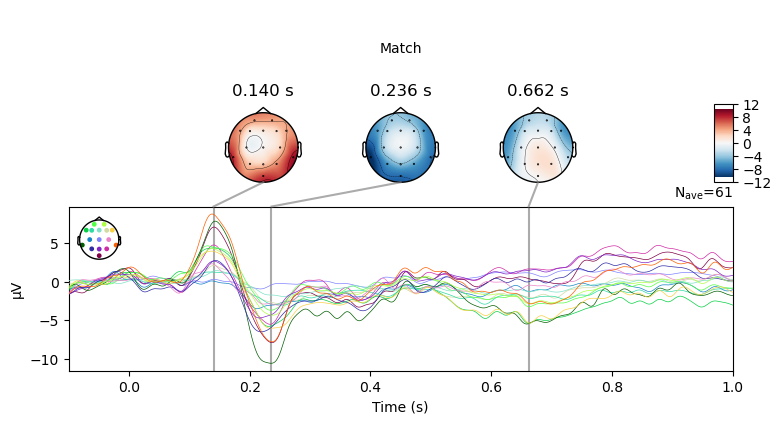

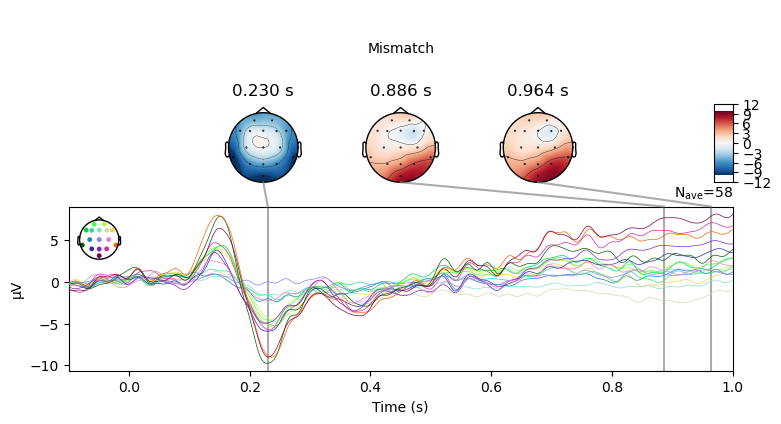

In [3]:
for c in evokeds.keys():
    evokeds[c].plot_joint(title=c);

## Examine contrasts between conditions

Viewing the ERPs for each experimental condition is a good first step, but ultimately any ERP experiment should be designed around *contrasts* between different conditions. In the present study, we are interested in the difference between match and mismatch items. We predicted an N400 component, which would be larger (more negative) for mismatch than match items. The N400 tends to be largest over the midline centre/posterior region of the scalp. So here we will plot the data at electrode Cz, which typically shows the N400 effect. We use the function `mne.viz.plot_compare_evokeds()`, which plots waveforms for each of a list of evoked items that you pass to it:

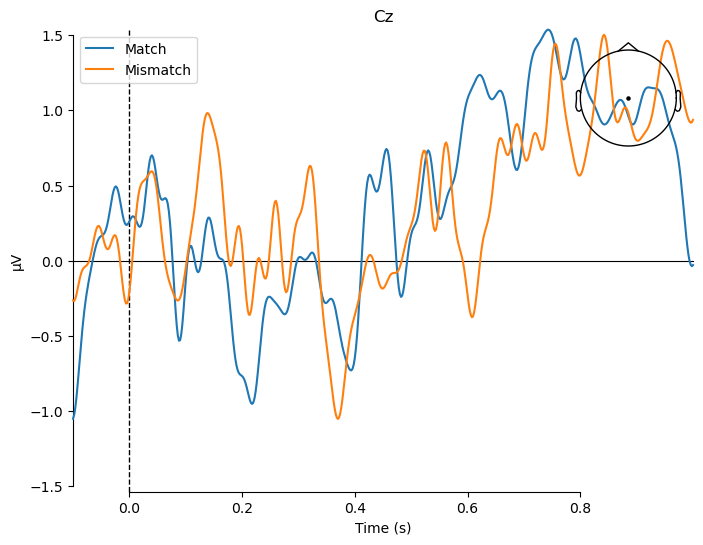

In [4]:
mne.viz.plot_compare_evokeds(evokeds, picks='Cz');

### What N400? 

You may wonder where the N400 effect is, because there is no clear difference between Match and Mismatch in the above plot! This is because of how the data were referenced. 

In this data set, the reference location is not recorded in the data file. However, we know (since this data was collected in my lab, and we are always careful to document our procedures) that the reference electrode was located at the International 10-20 System position FCz, which is located along the midline of the scalp, halfway between electrodes Fz and Cz. We can visualize this location by plotting all of the channels in the International 10-20 system like this:

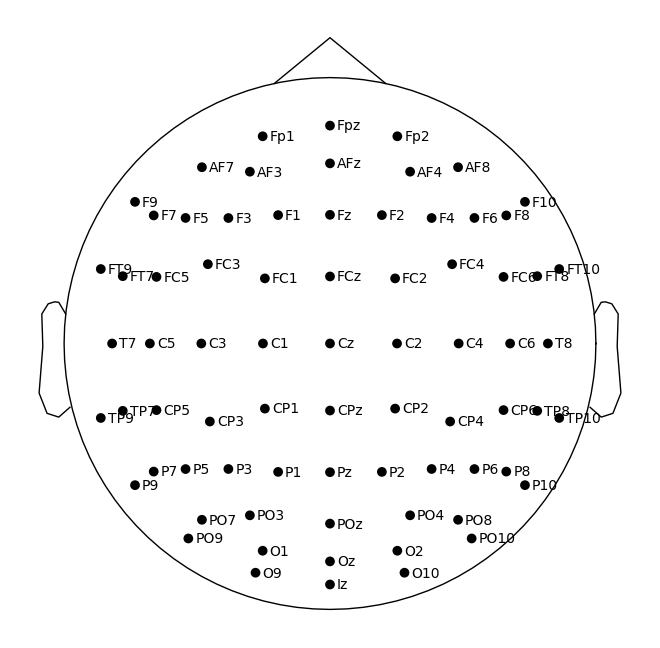

In [5]:
std_montage = mne.channels.make_standard_montage("easycap-M1")
std_montage.plot();

Note that these are not all channels in our data set — we're just using this to visualize the location of FCz.

The fact that the reference electrode was positioned between Fz and Cz means that we would expect the EEG at those two channels to be quite flat, since they are measuring nearly the same electrical activity. If we plot each of the midline channels, we can see that this is indeed the case. Note that since we want to compare the plots between channels, we use the kwarg `ylim` to set the y-axis limits to be the same for each plot; otherwise MNE auto-scales the amplitudes differently for each channel. We also pass kwargs to specify the locations of the legend and sensor location plot, so that they don't overlap with the ERP plots as they did in the earlier waveform plot.

/var/folders/9s/6fvdmxlx00z9sz6ftkrnh8dw0000gn/T/ipykernel_83707/2894479327.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


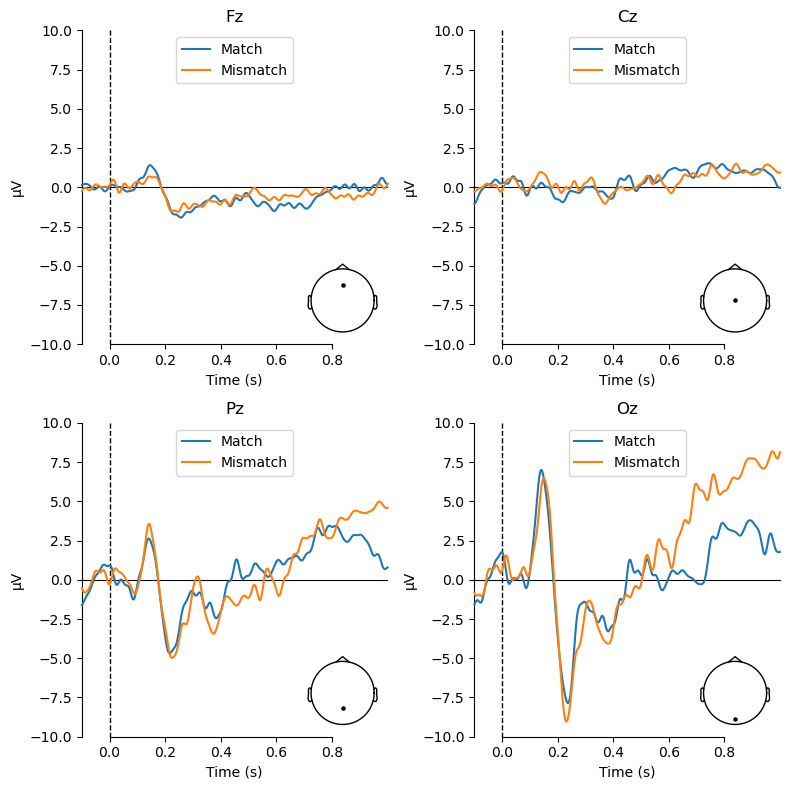

In [6]:
import matplotlib.pyplot as plt

# define the channels we want plots for
channels = ['Fz', 'Cz', 'Pz', 'Oz']

# create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# plot each channel in a separate subplot
for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower right',
                                legend='upper center',
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

The FCz reference location also explains why, in the scalp topography maps (re-plotted below), the area between electrodes Fz and Cz is white, or very close to it, at most time points. As indicated on the color bar below, white represents a value of zero. The values aren't exactly zero/white in the plots below, because in generating these plots, MNE interpolates values in between the electrodes. In other words, we only have voltage measurements at each electrode (the dots in the plots), and the colors at every other location are determined by mathematical estimates of what the voltage values likely would have been, based on the values at the electrodes we do have. Since both Fz and Cz measure slightly different locations than the reference, they are not zero, and the estimated values between them may also not be zero due to noise. 

Match


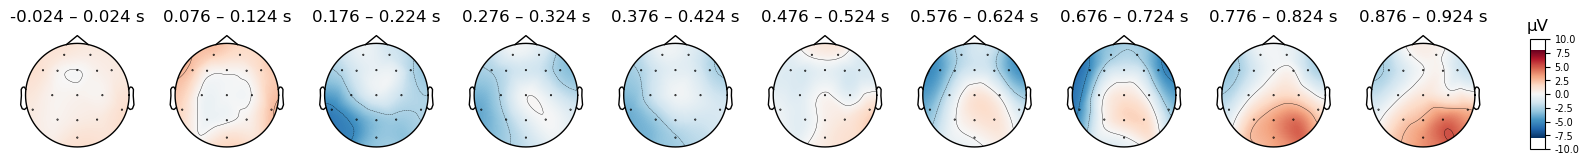

Mismatch


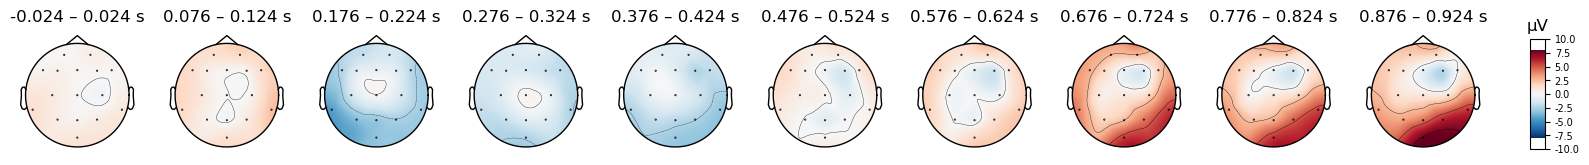

In [7]:
import numpy as np

# Specify times to plot at, as [min],[max],[stepsize]
times = np.arange(0, np.max(epochs.times), 0.1)

for condition in evokeds.keys():
    print(condition)
    evokeds[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));

## What Reference Should I Use?

While the choice of reference during recording is somewhat arbitrary, the choice of what to use as a reference in preprocessing is, however, an important one. Since this choice will influence the amplitude values at each channel, it will influence where ERP effects are identified, their polarity, and possibly how large they are.

A starting point for deciding on the re-referencing location is prior literature. In most areas of EEG/ERP research, there is an existing literature on the process and/or components of interest, and in many cases different research groups working on a topic will have converged on a common choice for reference location. Often this is a location that is relatively distant from the scalp location where the component(s) of interest are largest. For example in studies of face perception, the nose, or bridge of the nose, is often used because this is far from the area behind the ears where the N170 ERP component elicited by faces is largest. In contrast, in studies of language, the mastoid processes (the bony area right behind the ears) is used as the reference because this location is far from the top of the head, where the N400 and other components associated with language processing are largest. In this case, the potentials are averaged from the left and right mastoid locations, and then subtracted from every other electrode. This highlights another important consideration: since the brain is organized into two hemispheres, and many functions (such as language) tend to be lateralized to one hemisphere, it is good practice to choose a reference location that is either along the midline of the scalp (like the nose), or to average electrodes located over the left and right sides of the head.


## Average reference

An alternative to selecting a specific electrode(s) to re-reference to, is to use the average reference. In this case, the average potential across *all* electrodes is subtracted from each individual electrode. In principle, this is the ideal choice of reference because if all of the electrical activity recorded is from the brain, then the average electrical potential around the entire head should be zero. This is true because each source of electrical activity in the brain is an electrical *dipole*, with positive and negative values radiating out from the source in opposite directions. So, if we placed electrodes around the entire head with equal spacing between them, we would record the positive and negative potentials from each dipole source in the brain, which would sum to zero. Thus, at each channel the potential would reflect the relative potential at that scalp location relative to zero. However, in practice the situation is less ideal. Because of the fact that the head is attached to the neck (which we normally view as a Good Thing), we cannot place electrodes evenly around the entire head. Indeed, in practice EEG caps cover only the top half of the head, and typically the actual electrode positions cover a bit less than that. 

However, even in such less-than-ideal situations the average reference can be a good choice, because then the electrical potential at each scalp location still reflects what is unique to that position on the head relative to all other positions (from which we have recordings). There are a few limitations of average reference to keep in mind though. 

For one, if the experiment is designed to elicit an ERP component that is known to be quite large and extensive over the head, the average reference may not be a good choice. For instance, some components such as the P3 and N400 tend to be largest over the top of the head, but extend outward across many more channels. So if the same component is present at all or most of the channels used, then an average reference will effectively subtract that component from the data.  

A related consideration is the number of electrodes used during recording, and their locations. Average reference will work best when more electrodes used, and when more of the surface area of the head is covered by these electrodes. More electrodes both allow for more extensive scalp coverage, and ensure that the average is not biased by a few electrodes that have large potentials — including electrodes that may contain noise. Noisy electrodes are an issue for average reference because if there is high noise in a single electrode it will effectively be introduced into every other electrode by the averaging procedure, when it is used as a reference. More extensive coverage will mean that there is less likelihood that a widely-distributed component is subtracted in the average (because there will be more electrodes that aren't located over scalp regions where the component is present). 

### Re-Reference Our Data to the Average Reference

MNE provides a `.set_eeg_reference()` method to re-reference the data. We use dictionary comprehension to iterate over each condition in `evoked`, and re-reference each one to the average reference. 

::: {caution}

It is *very important* that you include the `.copy()` method in your chain of commands when you're modifying an Evoked (or Epochs) data object. This is because most methods in MNE modify the data in-place, rather than creating a new object. This is done for efficiency, since EEG data sets can be very large. However, it can lead to unexpected results if you're not careful. Even if you assign the output of a re-referencing command to a new variable, as we do below, MNE still modifies the original `evokeds` *as well*. So if you don't use `.copy()`, then the original `evokeds` will be re-referenced to the average reference. This would cause great confusion when we later tried to apply a different reference to the "original" `epochs` data, as we do below (I'll leave it to the reader to guess why I added this caution box...).

In [8]:
evokeds_avgref = {c:evokeds[c].copy().set_eeg_reference(ref_channels='average') 
                  for c in evokeds.keys()
                  }

### View Topomaps with Average Reference

We'll also re-plot the originally-reference data for easy comparison.

Match (average reference)


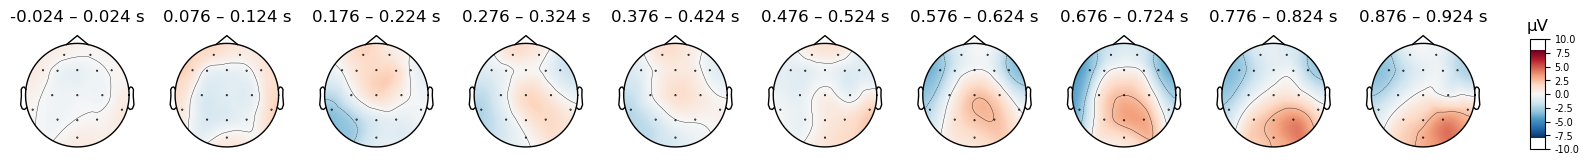

Match (original (FCz) reference)


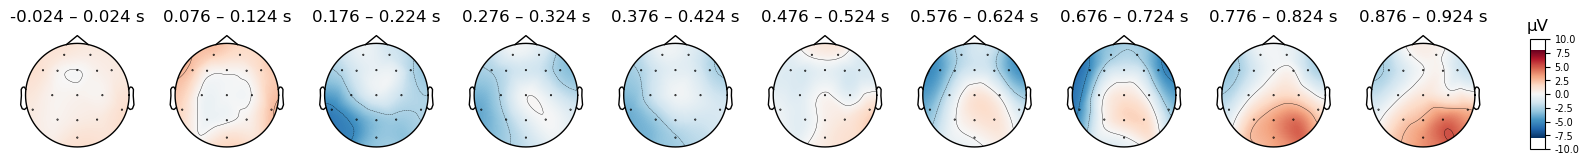

----------------------------------
Mismatch (average reference)


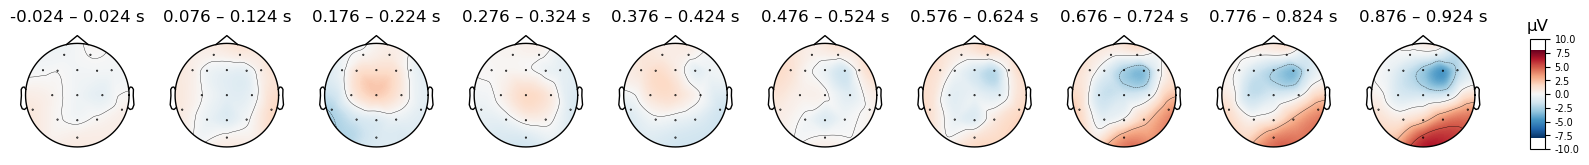

Mismatch (original (FCz) reference)


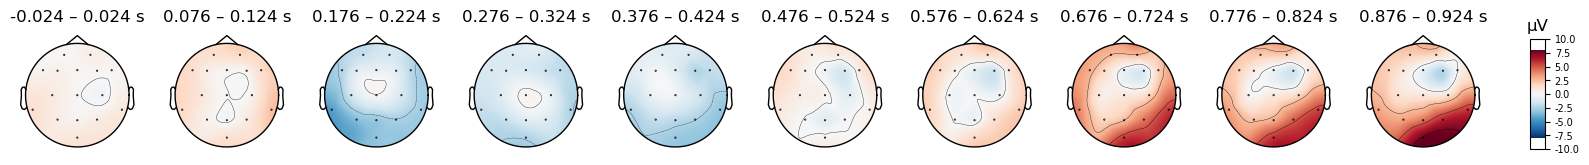

----------------------------------


In [9]:
for condition in evokeds_avgref.keys():
    print('----------------------------------')
    print(condition + ' (average reference)')
    evokeds_avgref[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));
    
    print(condition + ' (original (FCz) reference)')
    evokeds[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));
    


There are clear differences in the scalp topography between the original and averaged references. The patterns potentials across the scalp are similar — for instance, note the relatively strong positive potential over the posterior right scalp in the last time window, with a more negative potential over the anterior scalp. At the same time, the actual electrical potential values are quite different, in ways that could impact interpretation of the data. Note how the right anterior negativity appears stronger and more focal in the average reference, while the right posterior positivity appears stronger in the original reference.

### View Waveform Plots at Midline Channels with Average Reference

Compared to the original reference, you can see now that the waveforms at Fz and Cz are no longer as flat. As well, a difference between the Match and Mismatch conditions is apparent particularly at Cz, starting at approximately 500 ms. This is consistent with the N400 effect that we predicted, although somewhat later in time that a typical N400. 

/var/folders/9s/6fvdmxlx00z9sz6ftkrnh8dw0000gn/T/ipykernel_83707/4097726861.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


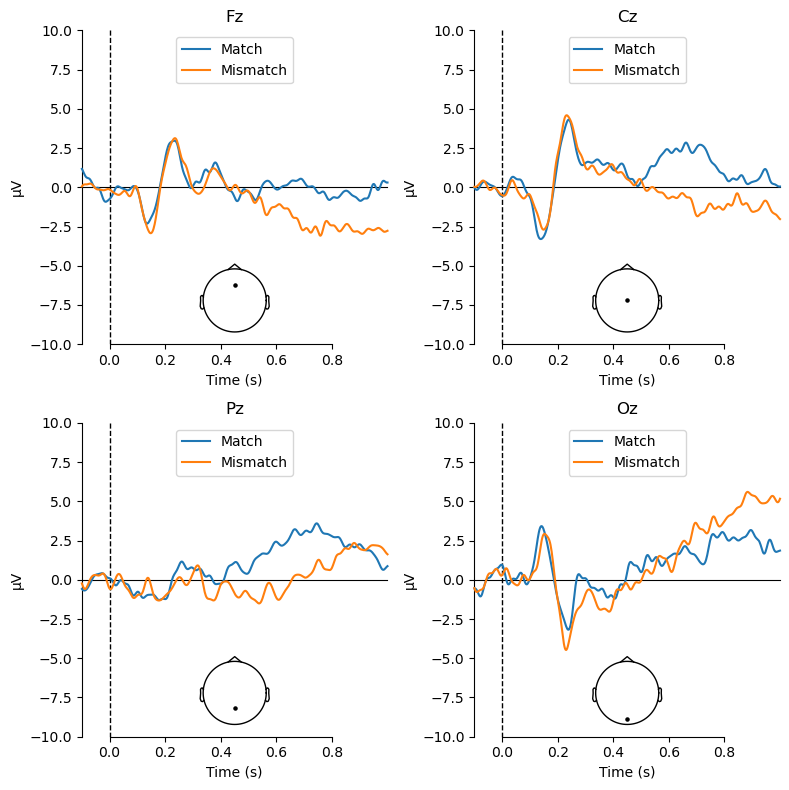

In [10]:
# create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# plot each channel in a separate subplot
for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds_avgref, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower center',
                                legend='upper center',
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

## Re-Reference the Data to Averaged Mastoids

Now we will re-reference to the average of the mastoid electrodes (whose labels are TP9 and TP10 in the 10-20 system — refer back to the plot of channel locations to see these on the montage). Note that we need to pass a *list* of channel locations to the `ref_channels` kwarg since there is more than one value to pass.

In [11]:
evokeds_mastoidref = {c:evokeds[c].copy().set_eeg_reference(ref_channels=['TP9', 
                                                                          'TP10'
                                                                          ]
                                                            ) 
                      for c in evokeds.keys()
                      }

### View Topomaps with Mastoid Reference

Match (mastoid reference)


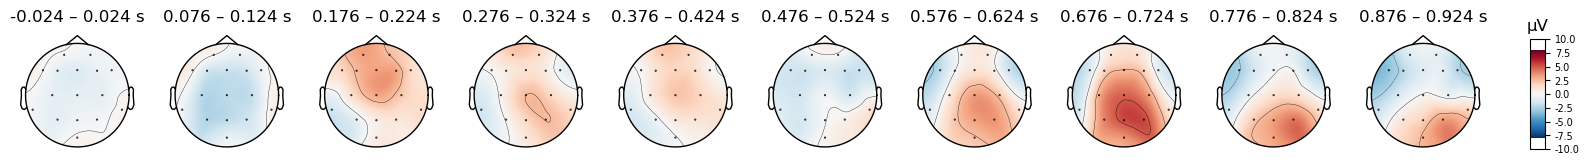

Match (average reference)


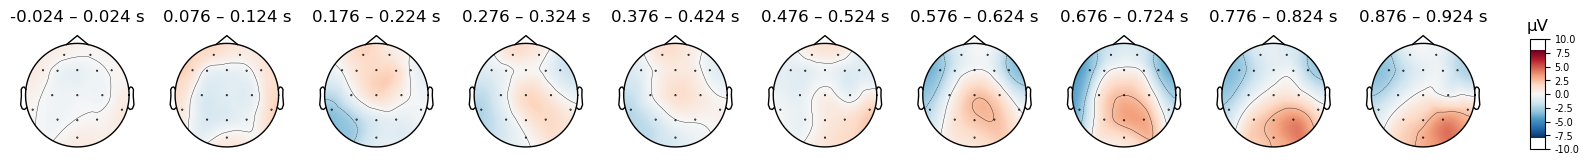

Match (original (FCz) reference)


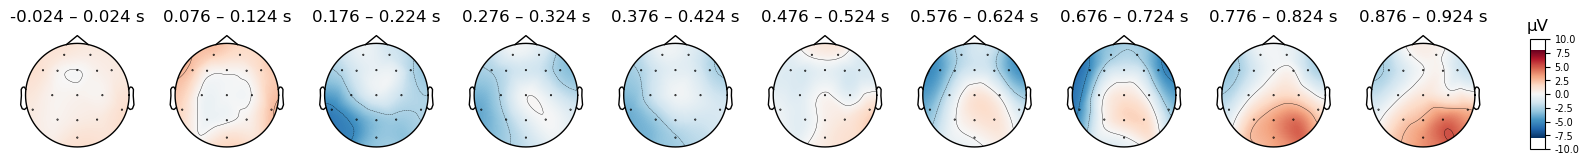

----------------------------------
Mismatch (mastoid reference)


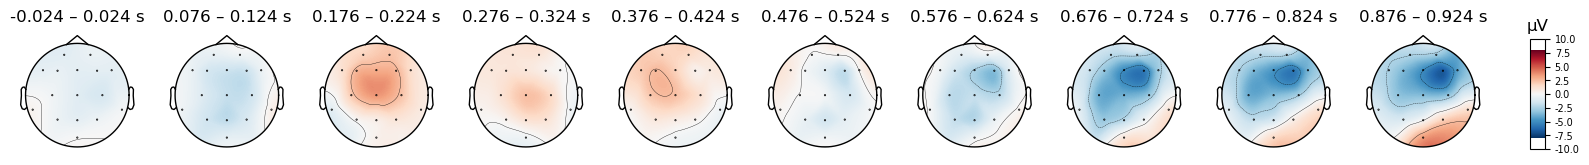

Mismatch (average reference)


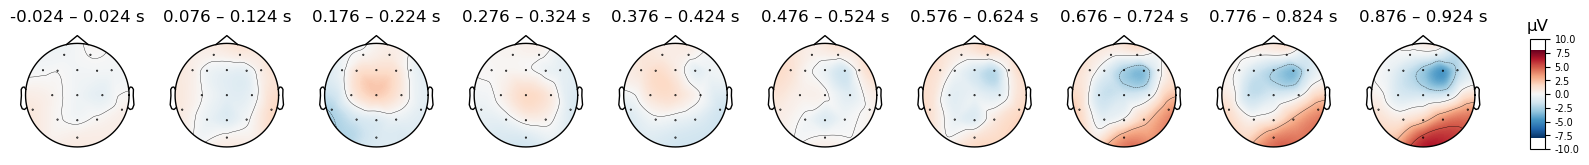

Mismatch (original (FCz) reference)


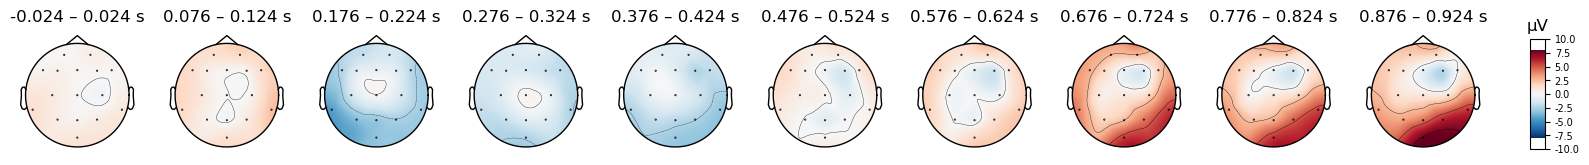

----------------------------------


In [12]:
for condition in evokeds_mastoidref.keys():
    print('----------------------------------')    
    print(condition + ' (mastoid reference)')
    evokeds_mastoidref[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));

    print(condition + ' (average reference)')
    evokeds_avgref[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));
    
    print(condition + ' (original (FCz) reference)')
    evokeds[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));    
    


Again, the relative distribution of electrical potentials across the scalp is similar to the original and average-referenced data. However, now the white, "zero voltage" area overlaps the locations behind the ears, and the top/centre electrodes (extending to more frontal electrodes) are more negative than when other references were used. As a consequence of this, a much stronger-appearing negativity is now apparent for the Mismatch condition in later time windows, over the midline and anterior frontal regions, relative to prior references.

### View Waveform Plots at Midline Channels with Mastoid Reference

Using the mastoid reference (which, again, is what is most commonly used in published N400 studies), we see an even larger N400 effect at Cz (as well as Fz and Pz now), with a larger negativity for mismatch than match items. The timing of this difference is the same as we saw with the average reference — because re-referencing does not change the timing of the ERP waveforms, but its magnitude is much larger. 

/var/folders/9s/6fvdmxlx00z9sz6ftkrnh8dw0000gn/T/ipykernel_83707/3537764921.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


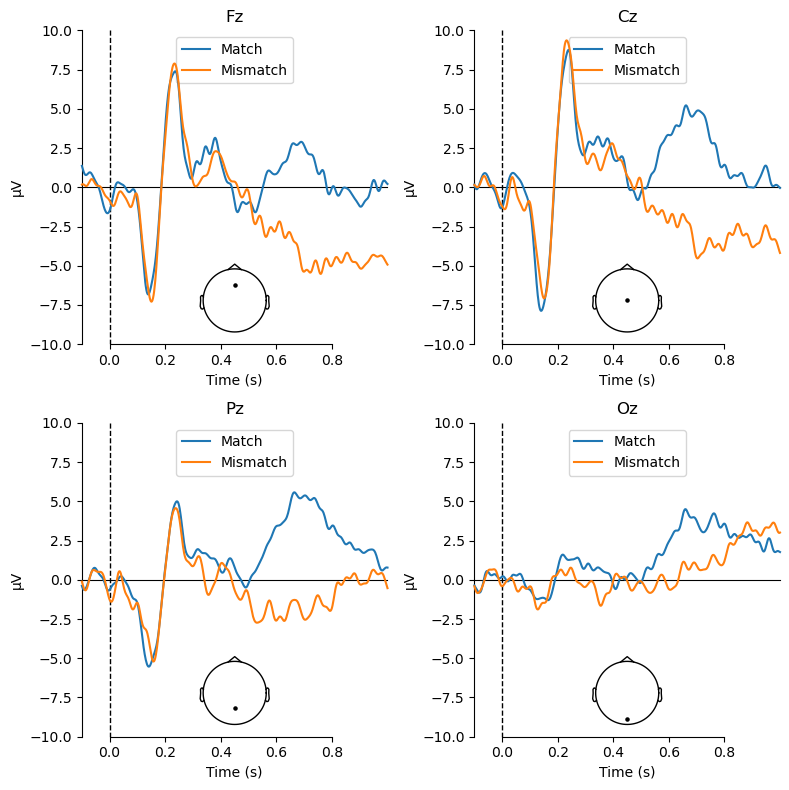

In [13]:
# create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# plot each channel in a separate subplot
for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds_mastoidref, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower center',
                                legend='upper center',
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

## Compare Mismatch Waveforms Between References

If we compare the waveforms for just the Mismatch condition between the different references, the impact of re-referencing becomes even more clear. Note especially how not only the amplitude, but even the *polarity* of the peaks around 150 and 230 ms changes with different references.

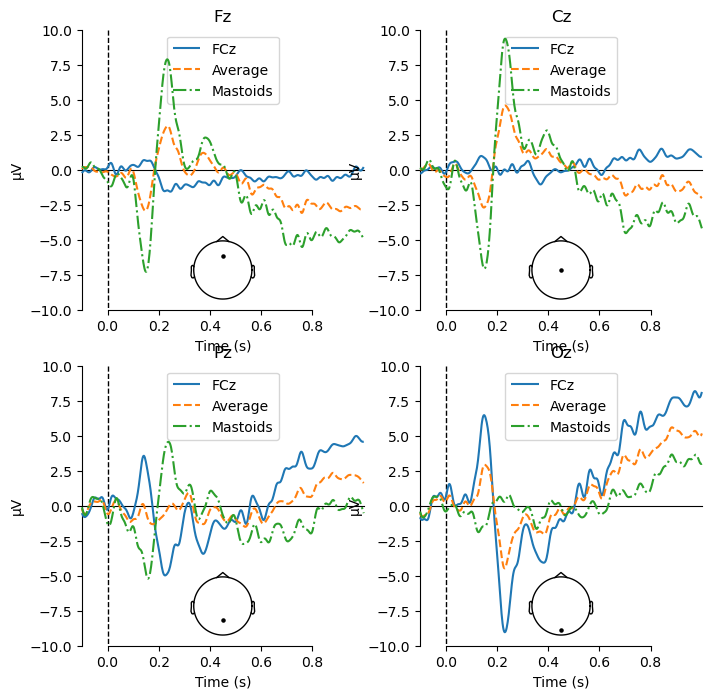

In [22]:
# create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# using different linestyles for each condition makes waves easier to distinguish,
# especially for colorblind individuals
linestyle_dict = {'FCz':'-', 'Average':'--', 'Mastoids':'-.'}

# plot each channel in a separate subplot
for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds({'FCz':evokeds['Mismatch'], 
                                  'Average':evokeds_avgref['Mismatch'],
                                  'Mastoids':evokeds_mastoidref['Mismatch']
                                  }, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower center',
                                legend='upper center',
                                linestyles=linestyle_dict,
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

Re-referencing can have even more dramatic — and significant to interpretation — effect on comparisons between conditions, as we will see below.

## Create difference waves 

Since the focus of most ERP experiments is on contrasts between conditions, it is useful to visualize these differences as weaveforms and topo maps. Computing difference waves allows us to view the experimental effect in a quite intuitive way: zero voltage means no difference between conditions, and and deviation from the zero line in the waveform plot (or from white in the topopmaps) indicates an experimental effect.

We create **difference waves** by subtracting the waveforms of between two conditions. Since the N400 manifests as a larger negativity for mismatch, it is conventional to compute this difference as Mismatch - Match (otherwise the difference between the two would appear as positive, rather than negative, voltage). 

MNE's `combine_evoked()` function allows us to combine Evoked data sets in different ways. To compute a difference, we pass the weights of `[1, -1]` to indicate we want to subtract the second Evoked data set listed (Match) from the first (Mismatch):

In [15]:
evokeds_diff = mne.combine_evoked([evokeds['Mismatch'], 
                                   evokeds['Match']
                                   ], 
                                  weights=[1, -1]
                                  )
    
evokeds_diff_avgref = mne.combine_evoked([evokeds_avgref['Mismatch'], 
                                   evokeds['Match']
                                   ], 
                                  weights=[1, -1]
                                  )

evokeds_diff_mastoidref = mne.combine_evoked([evokeds_mastoidref['Mismatch'], 
                                   evokeds['Match']
                                   ], 
                                  weights=[1, -1]
                                  )

## Plot Difference Waves

One advantage of difference waves is that they make it very clear when differences are occurring between conditions, and how large they are. When we compare waveforms for two conditions, the shape of the waveforms can sometimes make it hard to mentally compute the size of the difference - especially at time points when the waveforms' amplitudes are changing. In a difference waveform plot, the zero line clearly indicates no difference between conditions, and so the magnitude of the difference — as well as its timing — is easy to see. 

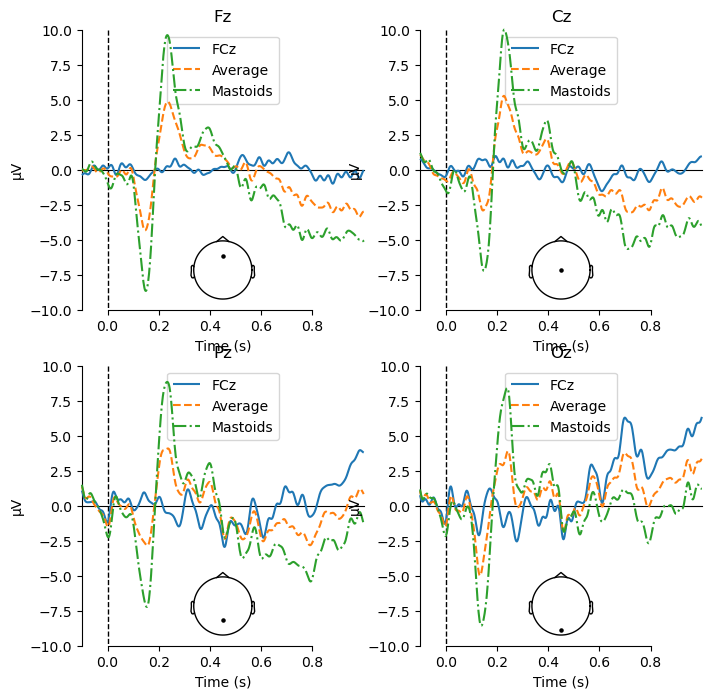

In [23]:
# create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# plot each channel in a separate subplot
for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds({'FCz':evokeds_diff, 
                                  'Average':evokeds_diff_avgref,
                                  'Mastoids':evokeds_diff_mastoidref
                                  }, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower center',
                                legend='upper center',
                                linestyles=linestyle_dict,
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

We can see even more clearly than before that the mastoid reference produces a much larger N400 effect than the other references we have examined. This is because the average reference effectively subtracts the N400 from the data, since it is largest over the top of the head, which is where the majority of recording electrodes were located. The mastoid reference also results in larger differences for the early components at 150 and 230 ms, although this is not an expected effect, and is unlikely to be replicated across participants.

## Topoplot of Difference Waves

And we can plot the scalp distribution of the differences as well, which nicely shows the scalp distribution of the N400, starting around 576 ms and peaking around 700 ms — corresponding to the negative peak in the waveform plot above. This timing is quite late for the N400, which is typically observed from approximately 300–500 ms. However, in this study the participant was being trained on a new language, and so these ERPs reflect their brain's response to words that they had only recently learned. N400s are often delayed when people are processing a language they are less fluent in (e.g., [Newman et al., 2012](https://dx.doi.org/:10.1162/jocn_a_00143)).

Mismatch (original (FCz) reference)


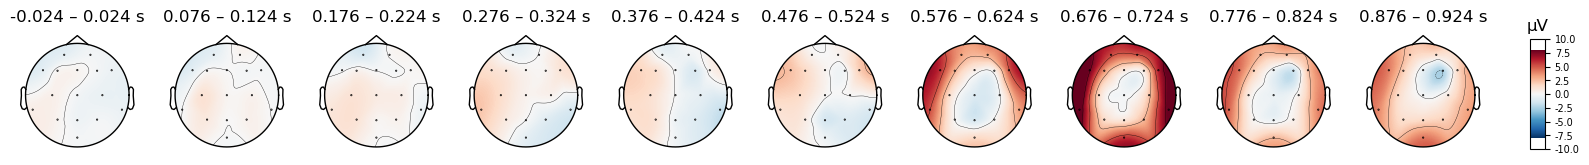

Mismatch (average reference)


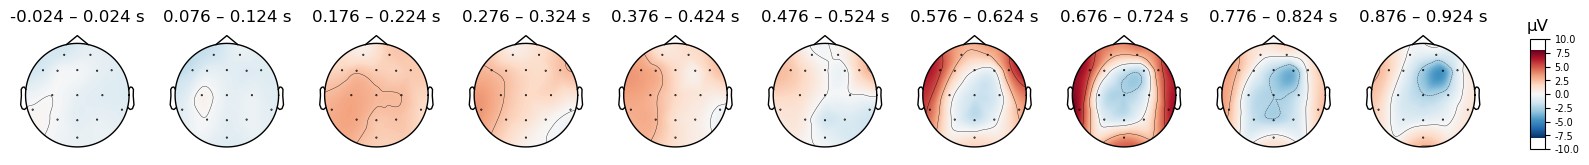

Mismatch (mastoid reference)


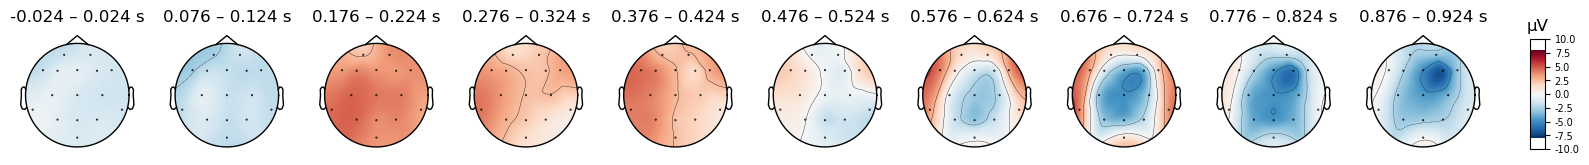

In [17]:
print(condition + ' (original (FCz) reference)')
evokeds_diff.plot_topomap(times=times, average=0.050, vlim=(-8, 8));    

print(condition + ' (average reference)')
evokeds_diff_avgref.plot_topomap(times=times, average=0.050, vlim=(-8, 8));

print(condition + ' (mastoid reference)')
evokeds_diff_mastoidref.plot_topomap(times=times, average=0.050, vlim=(-8, 8));

## My Head is Blowing Up. Are ERPs Even Real? 

If differences can be made larger or disappear entirely by changing the reference, can we trust any ERP results? The answer is a definitive "yes". The original EEG recording is a measurement of the relative electrical potential at each channel relative to the reference. All that changes when we re-reference is what the potential at each channel is *relative* to. If we choose a reference location at which important experimental differences between conditions happen, we subtract those differences from the data, which means we are unable to see them. This happens because the re-referencing is applied to each trial (if we're working with Epochs) or to the average of all trials within each condition (if we're working with Evokeds). So if we set the amplitude at, say, channel Cz to zero for the Match condition and the Mismatch condition, then the difference between them is $0 – 0 = 0$. 

Importantly, re-referencing cannot create a difference between conditions that didn't exist in the original data. If an individual showed no Mismatch – Match N400 effect, re-referencing could not make it appear like they did. All re-referencing can do is mask or unmask a true difference that exists in the data. However, it's critical to have a priori predictions as to what ERP components you are looking for, and where on the scalp you expect their differences between conditions to be largest. It's almost as important to have an understanding of where the differences between conditions are likely to be the smallest, and choose a reference location where you do not expect between-conditions ERP differences. The average reference is a relatively safe option in most cases, however with components that are broadly distributed over the top of the head using the average reference may attenuate, if not completely eliminate, experimental effects. This is because the majority of EEG electrodes are typically placed at scalp locations above the ears ane eyebrows, although systems with larger numbers of channels (> 64) typically have more electrodes over more inferior head locations.

---
## Save Evokeds to File

We can save Evoked objects to files using `mne.write_evokeds()`. We'll only save the mastoid-referenced data, since that's how we want to analyze the data.

Note that this function does not accept a dictionary as input, only a single `Evoked` object, or a list of `Evoked` objects. One potential source of error here is that, unlike dictionaries, lists don't have labels for their entries. Thus if you save a list of Evoked objects, you will need to remember the order of the conditions in the list — and relying on memory is a good way to ensure errors in the future, especially if anyone else will be using your data. MNE does provides a way to label Evoked objects: the `.comment` property:

In [18]:
evokeds_mastoidref['Match'].comment

'0.26 × Match/A + 0.25 × Match/C + 0.28 × Match/B + 0.21 × Match/D'

At the moment, this does indicate what condition the data are from, but in a somewhat messy way. Indeed, the comment there reflects the result of averaging the 4 different *Match* conditions into one `Evoked` object; the 02.5 values reflect the weighting of each condition in the average, which was based on the number of trials in each. In this case, we had equal numbers of trials of each of the four *Match* conditions, so all the weights are 25%. Since this information isn't terribly relevant now that we are treating all four conditions as the same (simply *Match*), so we can change the contents of the `.comment` property through assignment:

In [19]:
for condition in evokeds_mastoidref.keys():
    evokeds_mastoidref[condition].comment = condition

# view the results
evokeds_mastoidref

{'Match': <Evoked | 'Match' (average, N=61), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~95 kB>,
 'Mismatch': <Evoked | 'Mismatch' (average, N=58), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~95 kB>}

### Write Evoked Objects to File

Now that we have comments that will help clearly identify each `Evoked` object later, we can write these out to a file. In general, however, I prefer to save separate files for each condition (unless there are a large number of files). This is more transparent, both for future you and if others are working with your data, because rather than loading in a file with multiple Evoked objects and then looking at their comment properties to figure out which is which, this information is explicit in the file name. 

MNE imposes file naming conventions (rules), which specify that Evoked file names should always end in `-ave.fif`. It's good practice to use the participant ID and condition name in the file name as well. The `write_evoked()` function requires the output file name as its first argument, and the Evoked data as the second argument. 

In [20]:
for condition in evokeds_mastoidref.keys():
    mne.write_evokeds(data_dir + p_id + '_' + condition + '-ave.fif', 
                    evokeds_mastoidref[condition],
                    overwrite=True
                    )

### Save Difference Waves to File

Although we have only one contrast of interest in this study, it's still good practice to save every difference wave as a separate file, if you have more than one.

In [21]:
mne.write_evokeds(data_dir + p_id + '_Mismatch-Match-ave.fif', 
                    evokeds_diff_mastoidref,
                    overwrite=True
                     )

## Summary

Averaging across trials is an important final step in preprocessing, because it helps remove noise and reveal the signal of interest. MNE provides useful tools for averaging and visualizing ERP data, in particular for comparing waveforms between conditions — which is the main goal of most ERP experiments. The `mne.combine_evoked()` function can be used to compute difference waveforms, which provide additional useful visualizations since they focus the viewer's attention on the differences between conditions, rather than the morphology of the individual condition waveforms.

Re-referencing is closely tied to averaging, because the choice of reference determines the amplitude of ERPs at each channel, and thus the distribution of potentials over the scalp. The choice of reference is also important for interpreting ERP effects, because it can change the amplitude and even polarity of the ERP at each channel. Thus it is important to choose a reference location that is not close to the scalp location where the component of interest is largest. It is best to review prior literature to which you expect to compare your ERP results, and use the same reference as previously-published studies to ensure your results are comparable. The average reference is often a good default choice, although it can attenuate or eliminate ERP effects that are largest over the top of the head.

After each individual participant's data has been preprocessed through a pipeline line this, the next step in analyzing an ERP experiment would be a group-level analysis. In a group-level analysis, the data from all participants would typically be averaged, and visualized using waveform plots and scalp topographic maps similar to the ones we've created here for one participant. This is what we will explore in the next lesson.